# Relax, Inc. Take-Home Challenge

### Code

In [58]:
import pandas as pd

eng = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'], index_col='time_stamp')
eng.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [112]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [123]:
from datetime import datetime as dt

users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1", parse_dates=['last_session_creation_time'], 
                    index_col='object_id')
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [124]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   object 
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 937.5+ KB


In [136]:
eng_daily = eng.groupby('user_id').resample('1d').agg({'visited':'count'}).sort_values(['user_id', 'time_stamp']).reset_index(level=0)
eng_weekly = eng_daily.groupby('user_id').resample('1w').agg({'visited':'sum'}).reset_index(level=0)
adopted = eng_weekly[eng_weekly['visited'] == 3]
users['adopted'] = [user in np.unique(adopted['user_id']) for user in users.index]
users['invited'] = users['invited_by_user_id'].notnull()
users['last_session_creation_time'] = [int(time) if time==time else 0 for time in users['last_session_creation_time']]
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False,True
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,True,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,False,True
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False,True
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False,True


In [147]:
df = users.drop(columns=['creation_time','name','email','org_id','invited_by_user_id','last_session_creation_time'])
df = pd.get_dummies(df, columns=['creation_source','invited'])
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited_False,invited_True
object_id,,,,,,,,,,
1,1,0,False,1,0,0,0,0,0,1
2,0,0,True,0,1,0,0,0,0,1
3,0,0,False,0,1,0,0,0,0,1
4,0,0,False,1,0,0,0,0,0,1
5,0,0,False,1,0,0,0,0,0,1


In [148]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

grid_params = {'randomforestclassifier__n_estimators': [100, 300, 500, 800, 1200],
               'randomforestclassifier__max_depth': [None, 5, 8, 15, 25, 30],
               'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
               'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10],
               'standardscaler': [StandardScaler(), None]}

df = df.loc[df.notnull().all(axis=1)]

rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

X_cols = [col for col in df.columns if col != 'adopted']

X = df[X_cols]
y = df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

adopted_rf_random = RandomizedSearchCV(rf_pipe, param_distributions=grid_params, cv=5, n_jobs=-1, verbose=1)
adopted_rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.7s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              5,
                                                                              8,
                                                                              15,
                                                                              25,
                                                                              30],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,


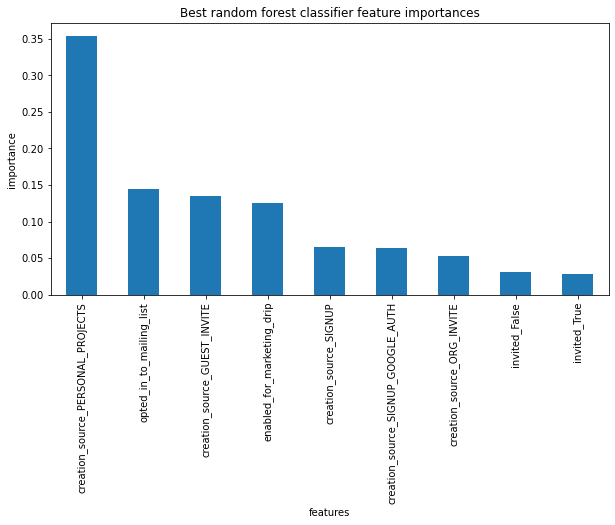

In [149]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 5))
imps = adopted_rf_random.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

### Most important factors

Making a quick model and plotting the feature importances, we can see that the most important feature by far is **whether the user was invited to join another user's personal workspace**. The next 3 most important features were **whether the user opted in to a mailing list, whether they were invited to be a guest to an organization as a guest, or whether they were enabled for marketing drip.** When including `last_session_creation_time` in our model, that became almost 100% important, so the more recent a user logged in last, the more likely they were to be an adopted user. However, this information may be a bit redundant. 